In [1]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf


--2025-07-25 00:48:27--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2025-07-25 00:48:27--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.1s    

2025-07-25 00:48:28 (887 KB/s) - ‘

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# !pip install -U --pre matplotlib
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

In [4]:
data = pd.read_csv('zooVisitor68.csv',encoding='utf-8-sig')
data.isnull().sum()

,0
รายการ,0
สวนสัตว์,0
ปีงบประมาณ,0
ต.ค. 67,0
พ.ย. 67,0
ธ.ค. 67,0
ม.ค.68,0
ก.พ. 68,0
มี.ค. 68,0
เม.ย. 68,0


In [5]:
data.describe()

,ปีงบประมาณ,Unnamed: 15,Unnamed: 16
count,63.0,0.0,0.0
mean,2568.0,NaN,NaN
std,0.0,NaN,NaN
min,2568.0,NaN,NaN
25%,2568.0,NaN,NaN
50%,2568.0,NaN,NaN
75%,2568.0,NaN,NaN
max,2568.0,NaN,NaN


In [6]:
data.head()


,รายการ,สวนสัตว์,ปีงบประมาณ,ต.ค. 67,พ.ย. 67,ธ.ค. 67,ม.ค.68,ก.พ. 68,มี.ค. 68,เม.ย. 68,พ.ค. 68,มิ.ย. 68,ก.ค. 68,ส.ค. 68,ก.ย. 68,Unnamed: 15,Unnamed: 16
0,ผู้ใหญ่,สวนสัตว์เปิดเขาเขียว,2568,"174,614","68,703","97,091","69,007","43,889","69,649","93,962","58,418","42,288",-,-,-,NaN,NaN
1,เด็ก,สวนสัตว์เปิดเขาเขียว,2568,"64,740","16,717","20,830","15,101","9,915","20,910","30,226","15,375","7,644",-,-,-,NaN,NaN
2,โครงการให้บริการความรู้ อสส.,สวนสัตว์เปิดเขาเขียว,2568,"4,035","4,876","5,894","11,099","11,837","11,486",962,"1,422","2,753",-,-,-,NaN,NaN
3,โครงการทัวร์สวนสัตว์,สวนสัตว์เปิดเขาเขียว,2568,"20,060","21,699","26,079","34,682","28,831","23,612","17,061","11,511","12,681",-,-,-,NaN,NaN
4,ผู้ใหญ่ (ชาวต่างชาติ),สวนสัตว์เปิดเขาเขียว,2568,"4,584","4,963","6,499","6,757","4,337","3,364","3,057","2,020","2,191",-,-,-,NaN,NaN


# **Question:**
1. What zoo that have most visitors for each month ?
2. Total visitors each month
3. what is the populest zoo for student ?
4. porpertion of visitors
5. compare total of visitors

# What zoo that have most visitors *

In [22]:
# first_df = data.copy()
# first_df['มิ.ย. 68'] = first_df['มิ.ย. 68'].str.replace(',','')
# first_df['มิ.ย. 68'] = first_df['มิ.ย. 68'].str.replace('-','0')
# first_df['มิ.ย. 68'] = first_df['มิ.ย. 68'].astype(int)
# grouped = first_df.groupby('สวนสัตว์',as_index=False)['มิ.ย. 68'].sum()

# max_value = grouped['มิ.ย. 68'].max()

# row = grouped[grouped['มิ.ย. 68'] == max_value]
# print('สวนสัตว์ที่มีผู้เข้าชมเยอะที่สุดคือ: ', row['สวนสัตว์'].values[0])
first_df = data.copy()

month_list = list(first_df.columns[3:12])

zoo = []

for i in month_list:
  first_df[i] = first_df[i].str.replace(',','')
  first_df[i] = first_df[i].str.replace('-','0')
  first_df[i] = first_df[i].astype(int)
  grouped = first_df.groupby('สวนสัตว์', as_index=False)[i].sum()
  max_value = grouped[i].max()
  zoo_name = grouped[grouped[i] == max_value]['สวนสัตว์']
  zoo.append(zoo_name.values[0])
task = pd.DataFrame(month_list, columns=['เดือน'])
task['สวนสัตว์ที่มีผู้เข้าชมมากที่สุด'] = zoo
task.set_index('เดือน')


,สวนสัตว์ที่มีผู้เข้าชมมากที่สุด
เดือน,
ต.ค. 67,สวนสัตว์เปิดเขาเขียว
พ.ย. 67,สวนสัตว์เปิดเขาเขียว
ธ.ค. 67,สวนสัตว์เปิดเขาเขียว
ม.ค.68,สวนสัตว์เปิดเขาเขียว
ก.พ. 68,สวนสัตว์เปิดเขาเขียว
มี.ค. 68,สวนสัตว์เปิดเขาเขียว
เม.ย. 68,สวนสัตว์เปิดเขาเขียว
พ.ค. 68,สวนสัตว์เปิดเขาเขียว
มิ.ย. 68,สวนสัตว์เปิดเขาเขียว


# Total visitors for 6/2025

In [28]:
total_visitor = []
for i in month_list:
  grouped = first_df.groupby('สวนสัตว์', as_index=False)[i].sum()
  total = grouped[i].sum()
  total_visitor.append(total)

second_df = pd.DataFrame(month_list,columns=['เดือน'])
second_df['จำนวนนักท่องเที่ยงทั้งหมด'] = total_visitor
second_df.set_index('เดือน')

,จำนวนนักท่องเที่ยงทั้งหมด
เดือน,
ต.ค. 67,644274
พ.ย. 67,267723
ธ.ค. 67,437455
ม.ค.68,445923
ก.พ. 68,330847
มี.ค. 68,349980
เม.ย. 68,365278
พ.ค. 68,230537
มิ.ย. 68,214878


# what is the populest zoo for student on each month

In [48]:
# third_df = data.copy()
# third_df = third_df[third_df['รายการ'] == 'เด็ก']
# max_val = third_df['มิ.ย. 68'].max()
# zoo = third_df[third_df['มิ.ย. 68'] == max_val]['สวนสัตว์'].values[0]
# print('สวนสัตว์ที่เป็นที่นิยมสำหรับเด็กมากที่สุดก็คือ: ', zoo)
third_df = first_df.copy()
visitor_type = third_df['รายการ'].unique()
children_type = [e for e in visitor_type if 'เด็ก' in e]
third_df = third_df[third_df['รายการ'].isin(children_type)]
t_grouped = third_df.groupby('สวนสัตว์', as_index=False)[month_list].sum()

max_zoo_for_each_month = []

for month in month_list:
  idx = t_grouped[month].idxmax()
  row = t_grouped.loc[idx]
  max_zoo_for_each_month.append(row['สวนสัตว์'])

each_month_df = pd.DataFrame(month_list,columns=['เดือน'])
each_month_df['สวนสัตว์'] = max_zoo_for_each_month
each_month_df

,เดือน,สวนสัตว์
0,ต.ค. 67,สวนสัตว์เปิดเขาเขียว
1,พ.ย. 67,สวนสัตว์เปิดเขาเขียว
2,ธ.ค. 67,สวนสัตว์เปิดเขาเขียว
3,ม.ค.68,สวนสัตว์เปิดเขาเขียว
4,ก.พ. 68,สวนสัตว์เปิดเขาเขียว
5,มี.ค. 68,สวนสัตว์เปิดเขาเขียว
6,เม.ย. 68,สวนสัตว์เปิดเขาเขียว
7,พ.ค. 68,สวนสัตว์เปิดเขาเขียว
8,มิ.ย. 68,สวนสัตว์เปิดเขาเขียว


# Number of tourist on each month

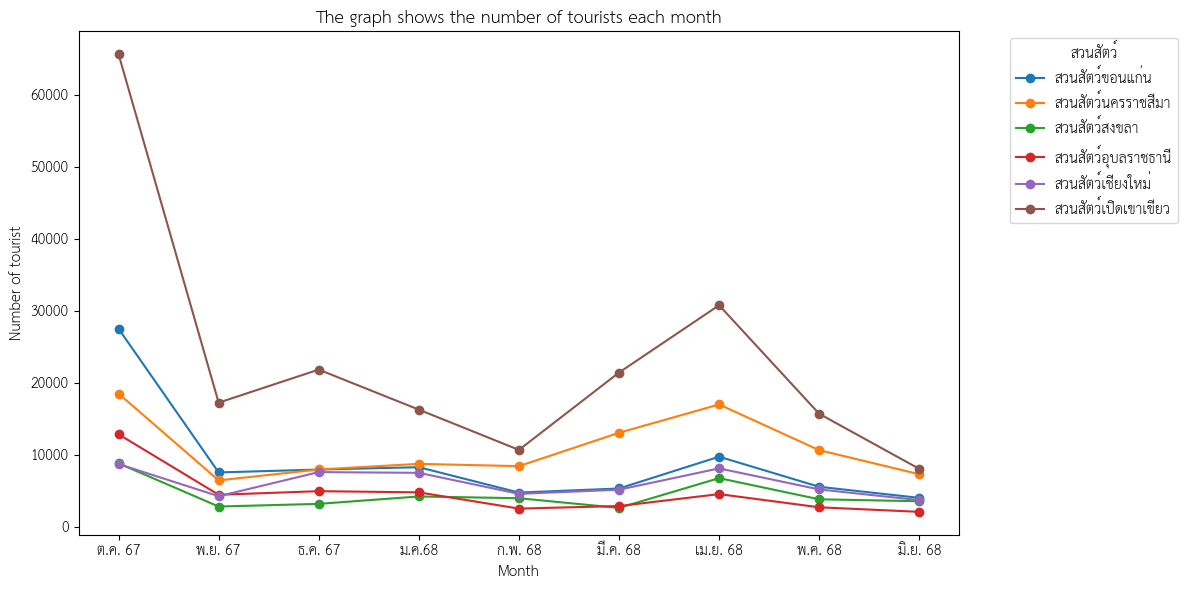

In [100]:
zoo = list(t_grouped['สวนสัตว์'])

plt.figure(figsize=(12,6))

for i in range(len(zoo)-1):
  value = t_grouped.loc[i][1:].values
  plt.plot(month_list,value, marker='o',label = zoo[i])
plt.title('The graph shows the number of tourists each month')
plt.xlabel('Month')
plt.ylabel('Number of tourist')
plt.legend(title='สวนสัตว์', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

In [99]:
long_df = t_grouped.melt(id_vars=['สวนสัตว์'], var_name='เดือน', value_name='จำนวน')
new_pivot = long_df.pivot(index='เดือน', columns='สวนสัตว์', values='จำนวน')
new_pivot.describe().iloc[:,:-1]

สวนสัตว์,สวนสัตว์ขอนแก่น,สวนสัตว์นครราชสีมา,สวนสัตว์สงขลา,สวนสัตว์อุบลราชธานี,สวนสัตว์เชียงใหม่,สวนสัตว์เปิดเขาเขียว
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,8957.000000,10890.000000,4410.333333,4634.888889,6081.666667,23058.666667
std,7201.761625,4354.305944,2044.840214,3266.900918,1879.979122,17279.306374
min,4014.000000,6442.000000,2618.000000,2072.000000,3699.000000,8042.000000
25%,5314.000000,7954.000000,3179.000000,2703.000000,4570.000000,15689.000000
50%,7543.000000,8736.000000,3814.000000,4445.000000,5183.000000,17233.000000
75%,8272.000000,13054.000000,4208.000000,4778.000000,7589.000000,21824.000000
max,27499.000000,18490.000000,8807.000000,12842.000000,8708.000000,65623.000000


# porpertion of visitors for each zoo and compare total of visitors

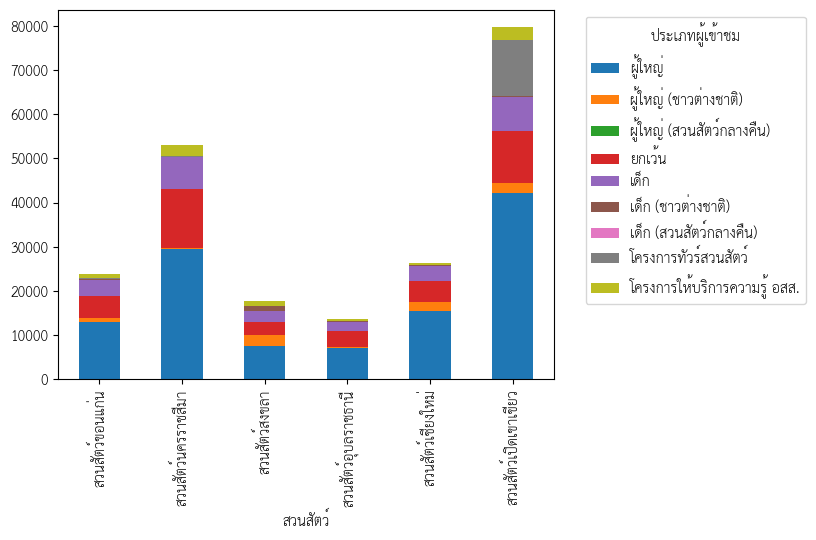

In [105]:
fourth_df = first_df.copy()

# zoo_list = fourth_df['สวนสัตว์'].unique()

# for i in zoo_list:

#   e_zoo = fourth_df[fourth_df['สวนสัตว์'] == i][['รายการ','มิ.ย. 68']]
#   e_zoo.name = i

#   e_zoo['มิ.ย. 68'].plot(kind='pie', labels=e_zoo['รายการ'], autopct='%1.1f%%')
#   plt.title(i)
#   plt.ylabel('')
#   plt.show()
fourth_df_pivot = fourth_df.pivot(index='สวนสัตว์',columns='รายการ',values='มิ.ย. 68')
fourth_df_pivot.iloc[:-1,:].plot(kind='bar', stacked=True)
plt.legend(title='ประเภทผู้เข้าชม', bbox_to_anchor=(1.05 , 1), loc='upper left', ncol = 1)